# E2a: Küchentischversuch zum Laval-Rotor

Name: Dennis Dibbern 

Datum: 15.12.2023 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie stark sind die Schwingungen von Alltagsgegenständen, die Vibrationen oder Rotationen durchführen? Ist der Pi geeignet, solche Schwingungen in hoher Frequenz zu messen?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

![Foto Handy](figures/Handy.JPG)

- Beschreibung des Aufbaus:
Der Beschleunigungssensor wird unter einem Smartphone plaziert und an den Pi angeschlossen.
- Vorgangsbeschreibung:
Der Sensor misst für ca. 20 Sekunden die Beschleunigung in X-, Y- und Z-Richtung, während das Smartphone angerufen wird und dementsprechend in einem gewissen Rhythmus vibriert. 

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py as h5
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = 'measurement_data' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20231212_193153_YourNameWithoutWhiteSpaces_handy.h5' # replace None by the filename of the hdf5-file

# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee99052-7c76-69b7-859b-014e8ed79ca0": {
    "type"

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
path = 'measurement_data/data_20231212_193153_YourNameWithoutWhiteSpaces_handy/data_20231212_193153_YourNameWithoutWhiteSpaces_handy.h5'

# Lese die Daten aus der HDF5-Datei
file = h5.File(path, 'r')
#print(file.keys())
data = file['1ee847be-fddd-6ee4-892a-68c4555b0981']
        
time = np.array(data['timestamp'])
acceleration_x = np.array(data['acceleration_x'])
acceleration_y = np.array(data['acceleration_y'])
acceleration_z = np.array(data['acceleration_z'])


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
betrag_acc = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

print(betrag_acc)

[10.1339095  10.1339095  10.1339095  ... 10.08131252 10.08131252
 10.08131252]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0, 0.5, 'delta t')

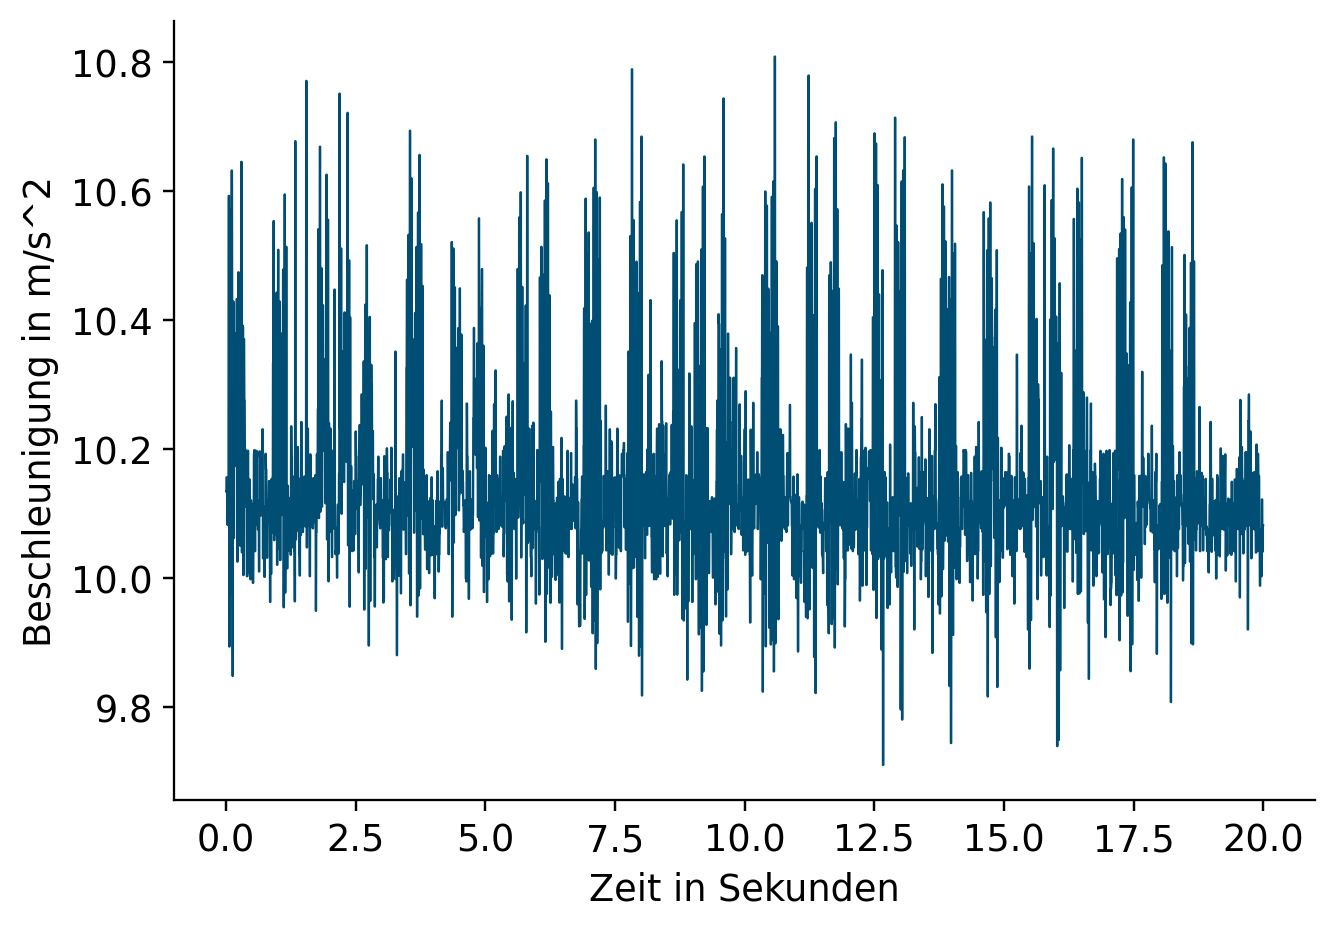

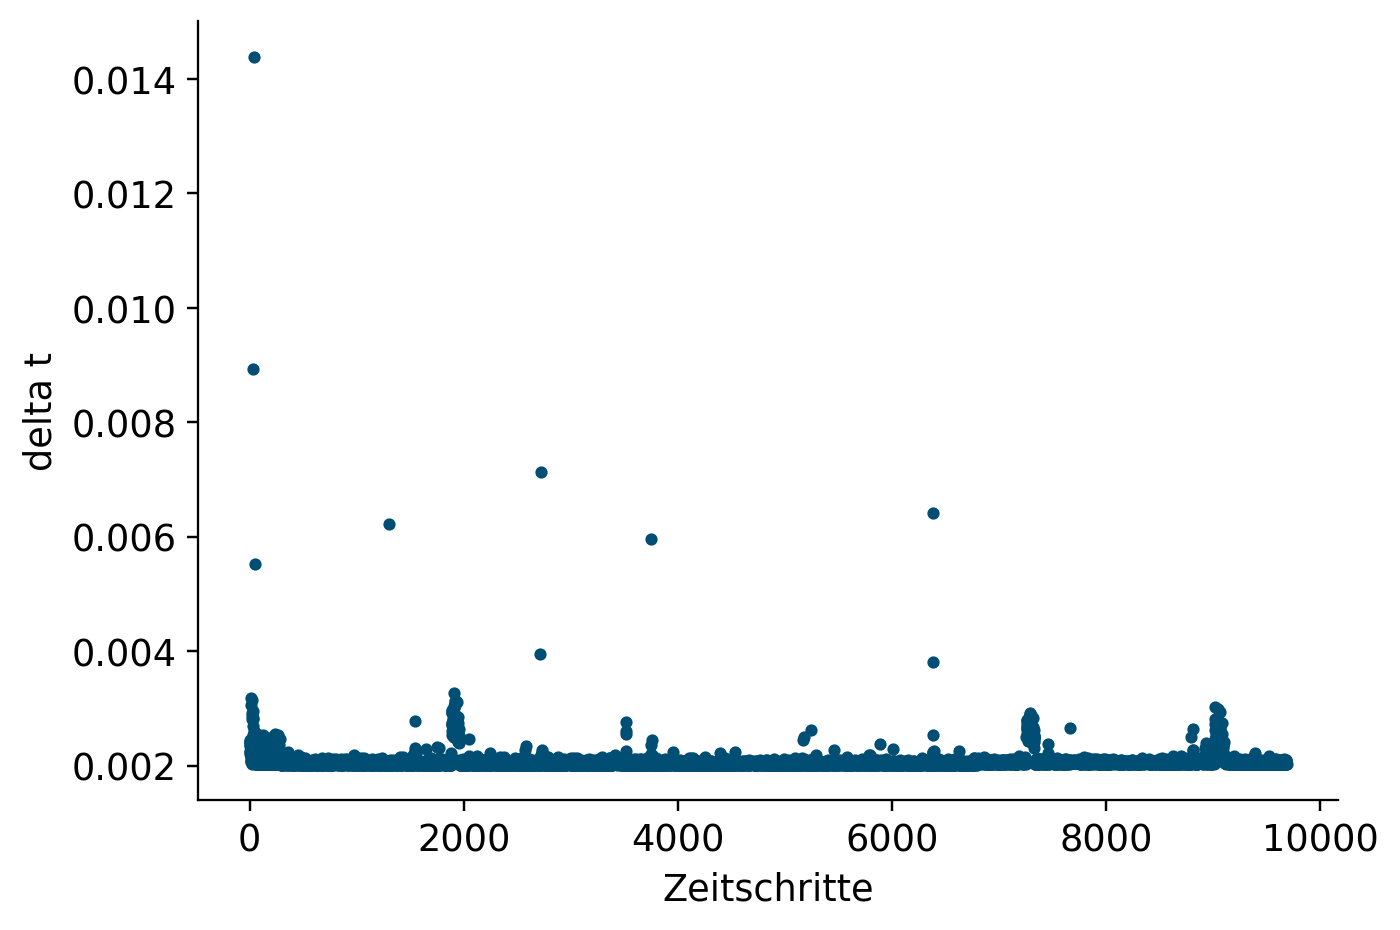

In [8]:
fig = plt.figure()
plt.plot(time, betrag_acc)
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in m/s^2')
#print(range(len(time)))

delta_t_liste = []
for i in range(1, (len(time))):
    delta_t_liste.append(time[i] - time[i-1])
    
fig2 = plt.figure()
plt.plot(delta_t_liste, '.')
plt.xlabel('Zeitschritte')
plt.ylabel('delta t')


#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [9]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

interpolierte_daten = interpolation(time, betrag_acc)
#plt.plot(interpolierte_daten)
#print(len(time))
#print(len(interpolierte_daten[0]))

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

Text(0, 0.5, 'Amplitude')

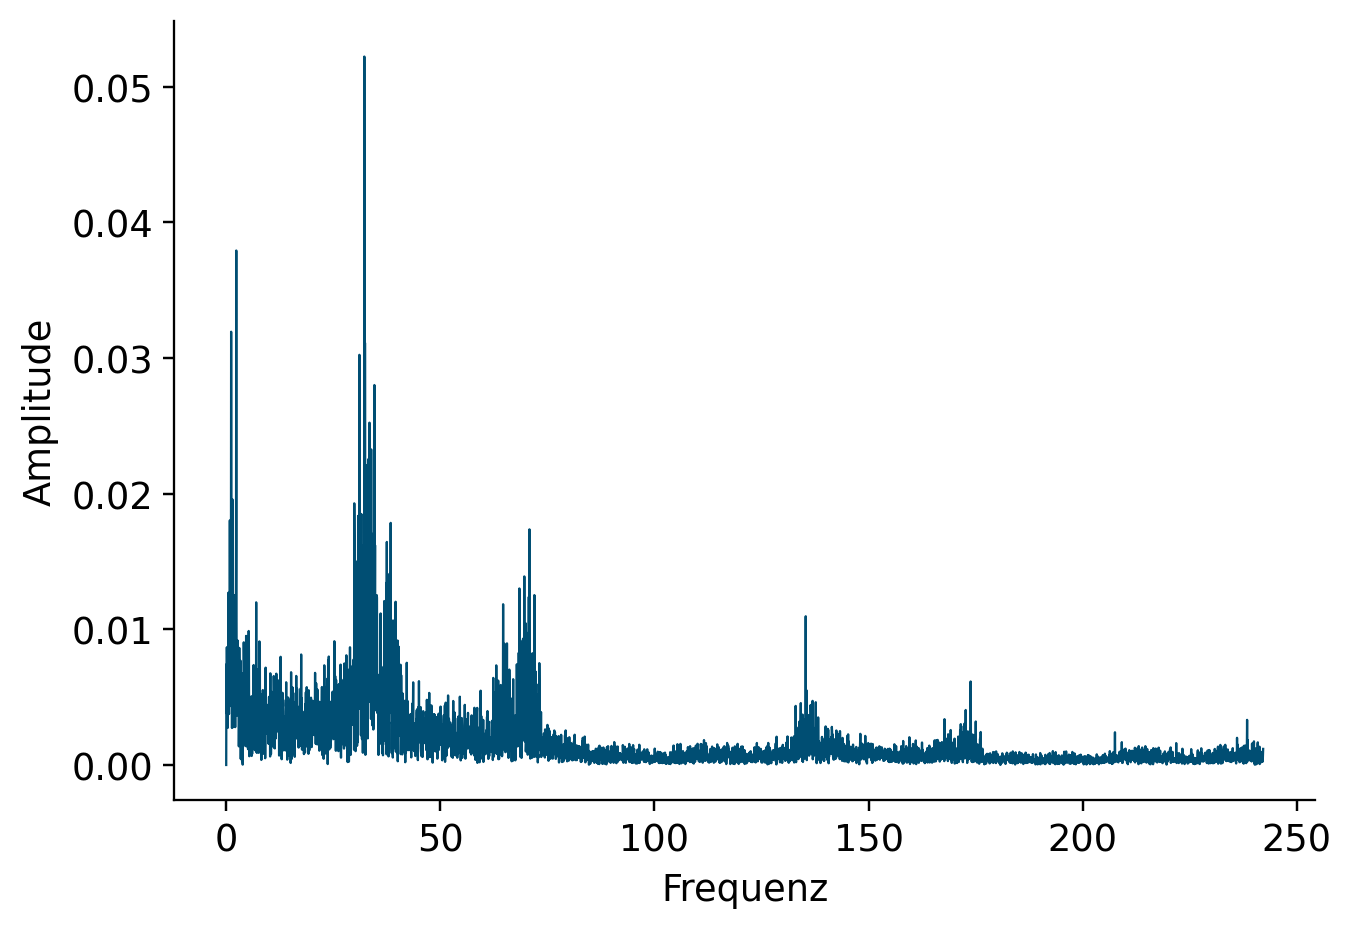

In [10]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

X_oneside, f_oneside = my_fft(interpolierte_daten, time)

fig2 = plt.figure()
plt.plot(f_oneside, np.abs(X_oneside))
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

![Bild Brotschneidemaschine](figures/Brotschneidemaschine.jpg)

- Beschreibung des Aufbaus: 
Der Beschleunigungssensor wird seitlich mit Klebeband an die Brotschneidemaschine angebracht. Der Sensor wird mit dem Pi verbunden und die Stromversorgung sichergestellt.

- Vorgangsbeschreibung:
Die Brotschneidemaschine wird eingeschaltet und die Messung am Pi gestartet. Nun misst der Pi für ca. 20 Sekunden die Beschleunigung in X-, Y- und Z-Richtung. 

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [11]:
"""Parameter definition"""

path_measurement_folder = 'measurement_data' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20231212_193153_YourNameWithoutWhiteSpaces_brotschneidemaschine.h5' # replace None by the filename of the hdf5-file

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee99052-7c76-69b7-859b-014e8ed79ca0": {
    "type"

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [12]:
path = 'measurement_data/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine/data_20231215_091708_YourNameWithoutWhiteSpaces_brotschneidemaschine.h5'

# Lese die Daten aus der HDF5-Datei
file = h5.File(path, 'r')
#print(file.keys())
data = file['1ee847be-fddd-6ee4-892a-68c4555b0981']
        
time = np.array(data['timestamp'])
acceleration_x = np.array(data['acceleration_x'])
acceleration_y = np.array(data['acceleration_y'])
acceleration_z = np.array(data['acceleration_z'])


#### 2. Betrag der Beschleunigung berechnen


In [13]:
betrag_acc = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten

Text(0, 0.5, 'delta t')

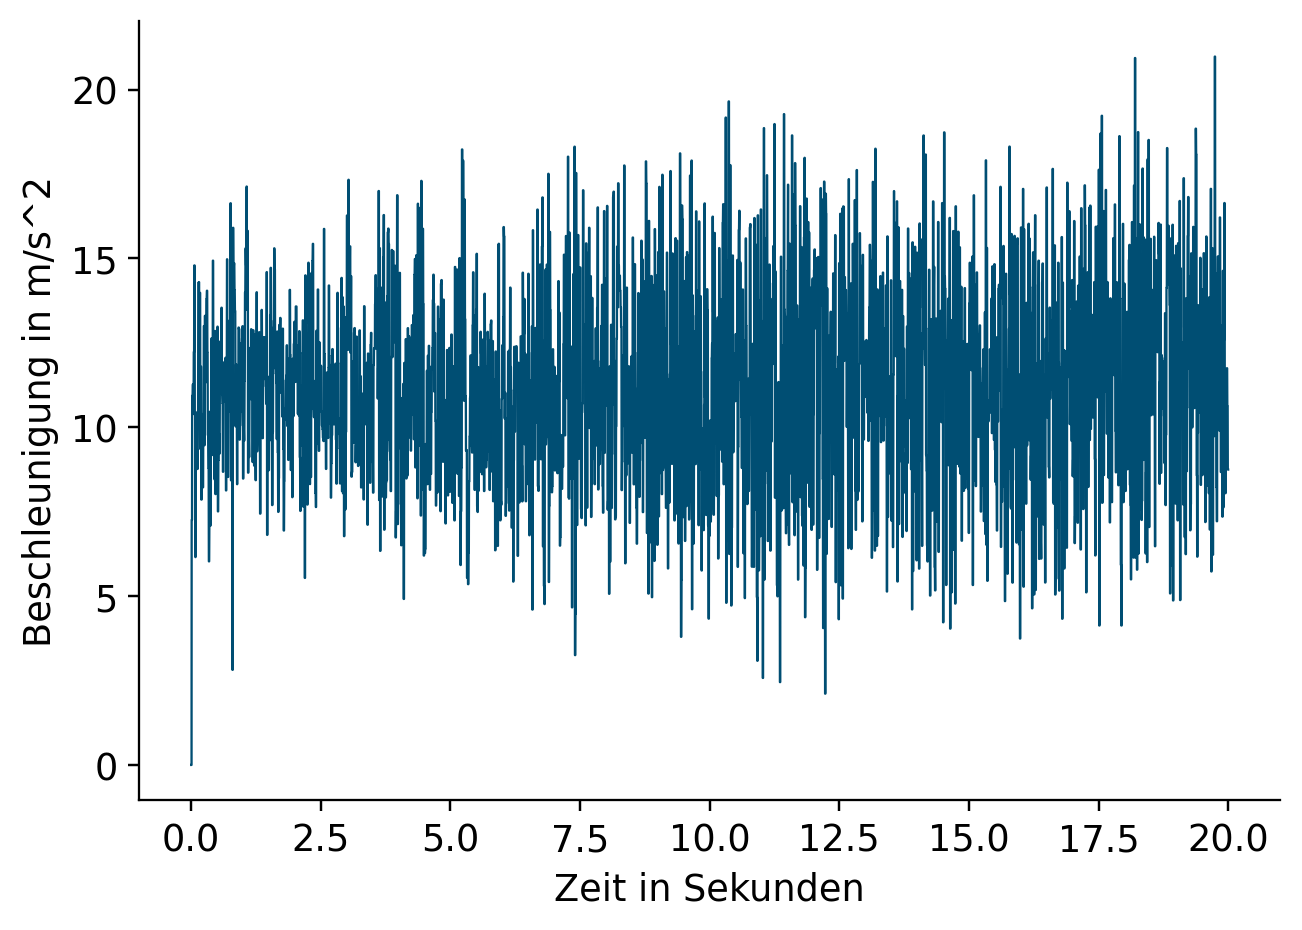

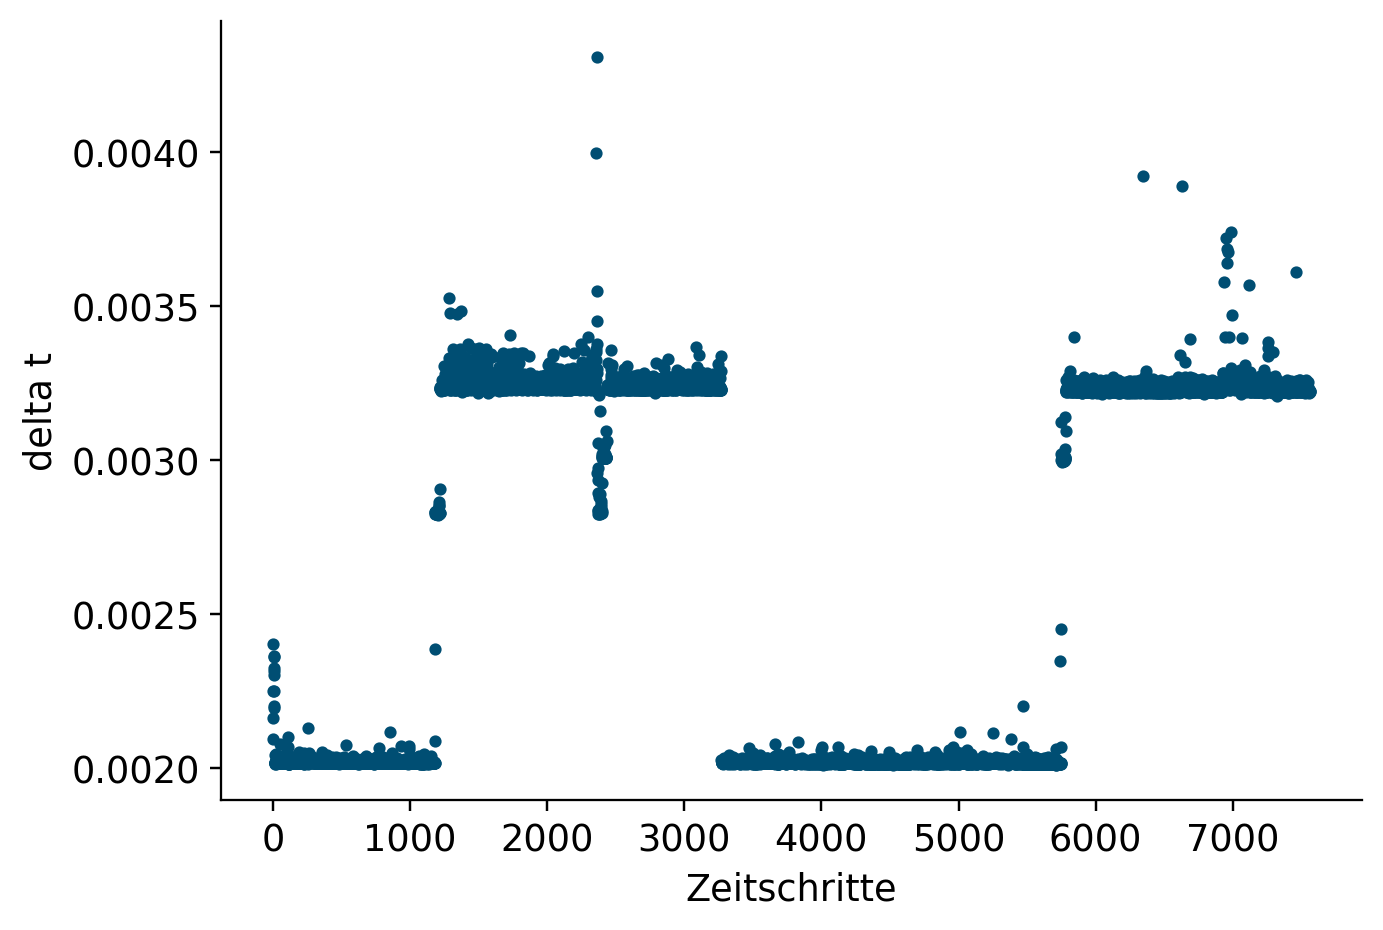

In [14]:
fig = plt.figure()
plt.plot(time, betrag_acc)
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in m/s^2')
#print(range(len(time)))

delta_t_liste = []
for i in range(1, (len(time))):
    delta_t_liste.append(time[i] - time[i-1])
    
fig2 = plt.figure()
plt.plot(delta_t_liste, '.')
plt.xlabel('Zeitschritte')
plt.ylabel('delta t')

#### 4. Interpolation der Messwerte



In [15]:
interpolierte_daten = interpolation(time, betrag_acc)

#### 5 & 6. FFT durchführen und graphisch darstellen


Text(0, 0.5, 'Amplitude')

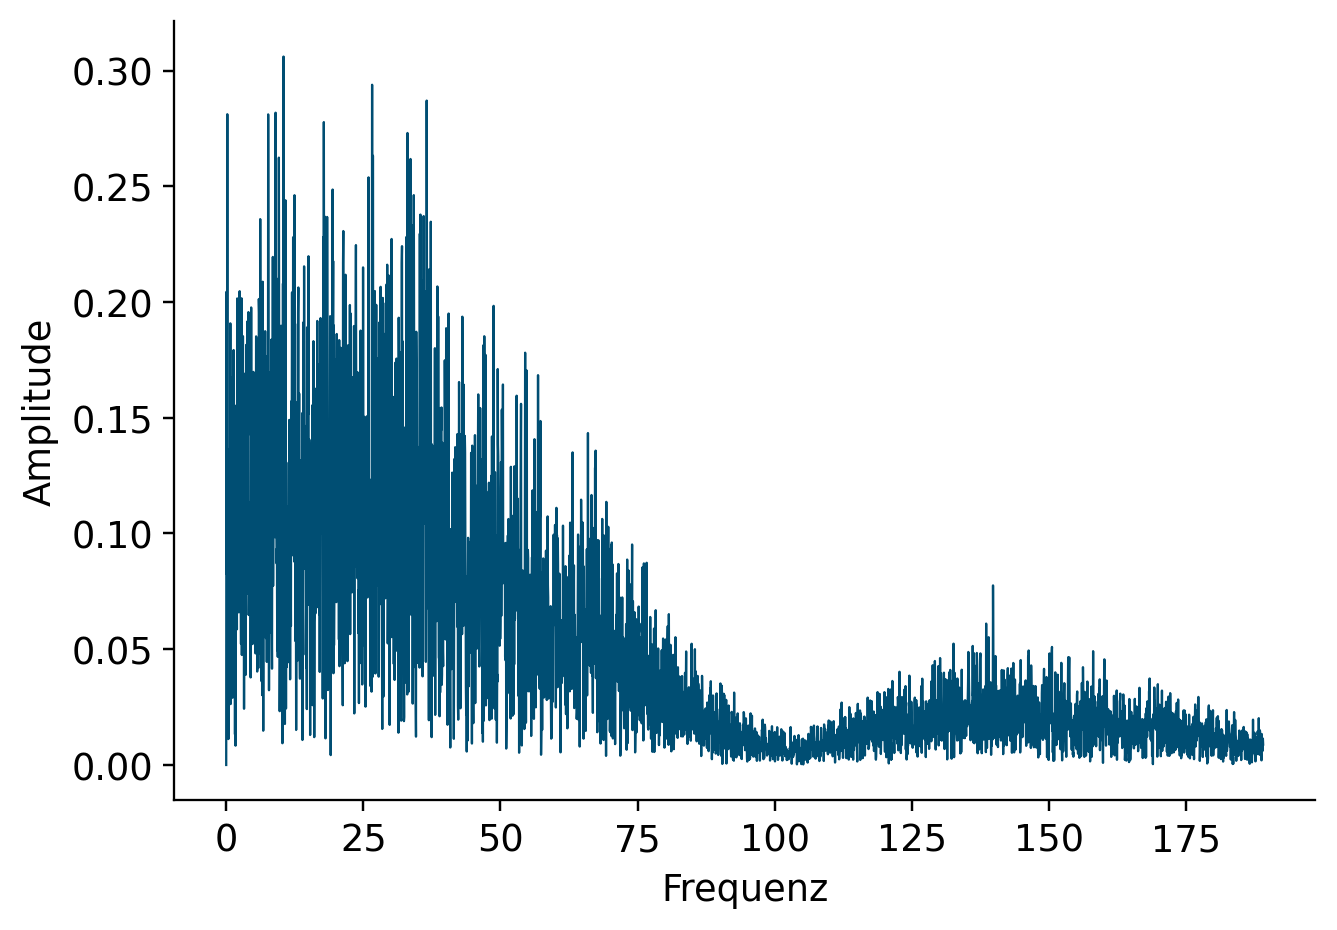

In [16]:
X_oneside, f_oneside = my_fft(interpolierte_daten, time)

fig2 = plt.figure()
plt.plot(f_oneside, np.abs(X_oneside))
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Wie man am Vergleich der Graphen der Beschleunigungen über der Zeit von Handy und Brotschneidemaschine erkennen kann, verursacht die Brotschneidemaschine deutlich größere Beschleunigungen als das Handy, was meinen Erwartungen auch entspricht. Mit 10 bzw 20 $\frac{m}{s^2}$ als maximale Beschleunigungen der Gegenstände wurden Werte ermittelt, mit denen nun eine Einschätzung für die Stärke von Beschleunigungen von Alltagsgegenständen vorgenommen werden kann. 

Was stark auffällt ist die Unregelmäßigkeit der Messabstände des Pi. Gerade bei der zweiten Messung gibt es viele und länger andauernde Ausreißer, weshalb die Interpolation der Messdaten definitiv erfolgen sollte. Der Pi ist also nicht für genauere Messungen geeignet, da ihn vermutlich die hohe Frequenz an Messungen leicht überfordert. 

An der Fourriertransformation kann man auch starke Unterschiede erkennen. Beim Handy sind einzelne Peaks der Amplitude bei bestimmten Frequenzen gut zu erkennen, während bei der Brotschneidemaschine eher große Amplituden im niedrigen und kleine Amplituden im hohen Frequenzbereich aufweist. Das könnte mit dem Rhythmus der Vibration des Handys zusammenhängen, während die Brotschneidemaschine eine gleichmäßige Schwingung durchführt. 

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der Homeversuch zum Lavalrotor hat mir persönlich gut gefallen. Das Programmieren hat gut funktioniert, war im angemessenen Umfang und zeitlichem Aufwand zu erledigen und Fragen konnten im Helpdesk gut geklärt werden. Ich habe das Gefühl, mit der Datenstruktur des Praktikums nun gut vertraut zu sein. 

Es war interessant, tatsächlich mal die Beschleunigungswerte von Alltagsgegenständen aufzunehmen und zu vergleichen, da ich vorher keine Vorstellung über die Größenordnung solcher Werte hatte. 

Insgesamt halte ich den Versuch für gelungen und finde, dass dieser Versuch bisher der am besten und verhältnismäßigste zu lösende Abschnitt im Praktikum Digitalisierung war.

